## 1. import dataframe 

### 1. import libraries

In [1]:
import pandas as pd
import numpy as np
from __future__ import print_function
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std

## 2. create data

In [27]:
nsample = 100
x = np.linspace(0,10,100)
X = np.column_stack((x,x**2))
beta = np.array([1,0.1,10])
e=np.random.normal(size=nsample)
X = sm.add_constant(X) # X array의 0열에 1 추가
y = np.dot(X, beta)+e #np.dot : 곱 연산 (100,1)

In [34]:
model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.407e+06
Date:                Sun, 24 Oct 2021   Prob (F-statistic):          3.29e-241
Time:                        12:53:37   Log-Likelihood:                -142.02
No. Observations:                 100   AIC:                             290.0
Df Residuals:                      97   BIC:                             297.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1278      0.299      3.772      0.0

## 3. simple linear regression ##

In [39]:
# load Boston housing data #
from sklearn.datasets import load_boston
boston = load_boston()
df = pd.DataFrame(data = boston.data, 
                 columns = boston.feature_names)
df['price'] = boston.target
#print(df)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  price  
0       15.3  396.90   4.98   24.0  
1       17.8  396.90   9.

In [43]:
## build reg.model ##
price = df[['price']]
crim = df[['CRIM']]
crim1 = sm.add_constant(crim, has_constant = "add")

## apply ols model ##
model1 = sm.OLS(target, crim1)
fitted_model1 = model1.fit()
print(fitted_model1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     89.49
Date:                Sun, 24 Oct 2021   Prob (F-statistic):           1.17e-19
Time:                        13:40:59   Log-Likelihood:                -1798.9
No. Observations:                 506   AIC:                             3602.
Df Residuals:                     504   BIC:                             3610.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.0331      0.409     58.740      0.0

In [54]:
## 예측값 확인 (아래 2식의 값은 같음) ##
np.dot(crim1, fitted_model1.params)
pred1 = fitted_model1.predict()
# 예측값 보기 : print(pred1) #

[ 24.03048217  24.02176733  24.02177563  24.01966646  24.00443729
  24.02071274  23.99644902  23.97309042  23.94540138  23.96250722
  23.93973403  23.98433377  23.99416963  23.77163594  23.76823138
  23.77261995  23.59552468  23.70751396  23.69982879  23.73176107
  23.51337514  23.67934745  23.52139661  23.62271965  23.72160552
  23.68412214  23.75413567  23.63627976  23.71216824  23.61689868
  23.56360486  23.4706396   23.45682622  23.55492323  23.36347899
  24.00646341  23.99265003  23.99983283  23.96042712  24.02163447
  24.01915993  23.98019433  23.97435675  23.96694145  23.98216648
  23.96193426  23.95490093  23.9379155   23.92770182  23.94185981
  23.99626634  24.01509937  24.01085198  24.01242555  24.02745959
  24.02766303  24.02457401  24.02716065  23.96898004  23.99022532
  23.97110996  23.96181385  23.98732314  23.9805846   24.02500581
  24.01822575  24.01492499  24.00907081  23.97683128  23.97989539
  23.99646148  23.96719057  23.99505814  23.95198215  24.00032275
  23.99361

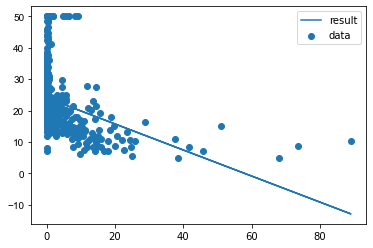

In [50]:
## 결과 시각화 ##
plt.yticks(fontname="Arial")
plt.scatter(crim, price, label = "data") # 실제값 점그래프
plt.plot(crim, pred1, label = "result") # 회귀 선그래프
plt.legend()
plt.show()

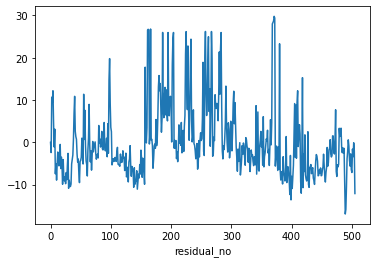

In [55]:
# 잔차 시각화 #
# 잔차값 보기 : fitted_model1.resid#
fitted_model1.resid.plot()
plt.xlabel("residual_no")
plt.show()

In [ ]:
## multiple linear regression ##